# Garimpagem de Dados

## Aula 4 - Exercídio de Classificação com kNN

13/10/2017

**Dataset:** Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/data

Partindo da aula passada:

1. Atualizar a função que mede a distância euclidiana para o pacote do scikit-learn 

2. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)

3. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta

4. Transformar as features categoricas em numéricas (tip: pandas ou scikit-learn)

5. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)

6. Selecionar as features baseada na correlação (tip: pandas)

7. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)

4. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

5. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [15]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [16]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def euc_distance(self, a, b):
        return np.linalg.norm(a-b)

    def closest(self, row,k):
        #calcula as distancias de cada ponto
        dists = np.array([self.euc_distance(row, item) for item in self.X_train])
        #ordena os labels mais proximos
        nei = dists.argsort()[:k]
        labels = [y_train[i] for i in nei]
        #conta os mais comuns
        counts = np.bincount(labels)
        #retorna o mais comum
        return np.argmax(counts)
        
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels

    def predict(self, to_classify,k):
        predictions = []
        for row in to_classify:
            label = self.closest(row,k)
            predictions.append(label)
        return predictions

In [17]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


substituindo valores categoricos por numericos e adicionando valores em celulas NaN ou vazias

In [18]:
#substituindo valores e deletando features descartaveis
df["Age"] = df.Age.fillna(df["Age"].mean())
df["Sex_code"] = LabelEncoder().fit_transform(df["Sex"])
df["Cabin_code"] = LabelEncoder().fit_transform(df["Cabin"])
df["Embarked_code"] = LabelEncoder().fit_transform(df["Embarked"])

#deletando colunas repetidas e sem importancia
del df["Sex"]
del df["Cabin"]
del df["Embarked"]
del df["Name"]
del df["Ticket"]
del df["PassengerId"]

#deletando valores NaN
df = df.dropna(axis = 0, how ='any')

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_code,Cabin_code,Embarked_code
0,0,3,22.0,1,0,7.2500,1,0,4
1,1,1,38.0,1,0,71.2833,0,768,2
2,1,3,26.0,0,0,7.9250,0,509,4
3,1,1,35.0,1,0,53.1000,0,742,4
4,0,3,35.0,0,0,8.0500,1,510,4


In [19]:
#matriz de correlacao
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_code,Cabin_code,Embarked_code
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.250409,-0.177347
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.500963,0.174782
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.133359,-0.042870
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,0.004596,0.071765
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,0.014764,0.043784
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.352913,-0.230493
Sex_code,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.135848,0.119759
Cabin_code,0.250409,-0.500963,0.133359,0.004596,0.014764,0.352913,-0.135848,1.000000,-0.140466
Embarked_code,-0.177347,0.174782,-0.042870,0.071765,0.043784,-0.230493,0.119759,-0.140466,1.000000


In [20]:
#em relacao a survived, temos forte correlacao com as classes pclass, fare, sex e cabin
#logo todas as outras serao deletadas
del df["Age"]
del df["SibSp"]
del df["Parch"]
del df["Embarked_code"]
df.head()

,Survived,Pclass,Fare,Sex_code,Cabin_code
0,0,3,7.2500,1,0
1,1,1,71.2833,0,768
2,1,3,7.9250,0,509
3,1,1,53.1000,0,742
4,0,3,8.0500,1,510


In [21]:
#dividindo entre X e Y
Y_train = df["Survived"]
X_train = df.loc[:,"Pclass":]

In [22]:
#normalizando dados e splitando 
X_train = MinMaxScaler().fit_transform(X_train)
Y_train = Y_train.values

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25)

print(X_train)

[[ 0.5         0.02049464  0.          0.03841537]
 [ 1.          0.01517579  0.          0.78991597]
 [ 0.5         0.04489301  0.          0.41656663]
 ..., 
 [ 1.          0.01473662  0.          0.54741897]
 [ 0.          0.05797054  1.          0.88955582]
 [ 0.5         0.          1.          0.18607443]]


In [23]:
#fazendo cross validation 
knn = KNNClassifier()
acc = []
neibourhs = []

for k in range(1,30,4):
    knn.fit(X_train, y_train)
    result = knn.predict(X_test, k)
    accuracy = metrics.accuracy_score(result,y_test)
    acc.append(accuracy)
    neibourhs.append(k)

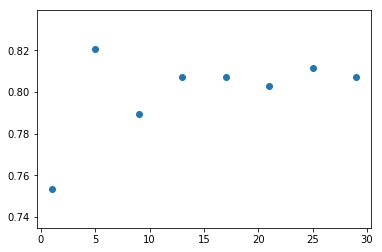

In [24]:
#plotando grafico de vizinhos x acuracia
plt.scatter(neibourhs,acc)
plt.show()

In [25]:
#escolhendo melhor numero de vizinhos respectiva acuracia
best_k = neibourhs[np.argmax(acc)]
best_acc = max(acc)
print ("best number of neighbours: {:d} with accuracy of {:.3f}".format(best_k,best_acc))

best number of neighbours: 5 with accuracy of 0.821


In [26]:
#resultados para melhor numero de vizinhos
knn.predict(X_test,best_k)
print(classification_report(y_test, result, target_names=['Survived', 'Not Survived']))

              precision    recall  f1-score   support

    Survived       0.79      0.92      0.85       135
Not Survived       0.84      0.64      0.72        88

 avg / total       0.81      0.81      0.80       223

